# Import Pkgs + Data

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
user_data = pd.read_csv(r'/Users/schen2/Documents/HHP User Data_0421_0621.csv')

In [22]:
user_data

,﻿USER_ID,Paid User,OG Claimed,Received Goody,Gifted Self,Promo Code Used,WOM Acq,Paid Acq,Index,BDay Gift,Casual Gift,Holiday Event Gift
0,0a1b052d-d899-4d4c-8cc0-1e0606fbc420,0,1,0,0,0,0,0,1,0,1,0
1,0a1e354e-6771-4e3c-a918-d4ef84633225,0,0,0,0,0,0,0,2,0,0,0
2,0a2c40fa-244c-4741-beb2-80025f752c18,0,1,0,0,0,0,0,3,0,1,0
3,0a2e0954-86b6-4a76-b227-3a75e53a1b92,0,0,0,0,0,0,0,4,0,0,0
4,0a2f105b-27ce-4447-8fbf-4ee1e5cb2bc2,0,1,0,0,0,0,0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22590,ffeae96b-0afd-4072-8e64-32259e8054b8,0,0,0,0,0,0,0,"22,591",0,0,0
22591,fff0f1e0-c5c5-43b3-bbb5-0959d35de0cb,0,0,0,0,1,1,0,"22,592",0,1,0
22592,fff2e2a2-7c7a-4f00-9472-365637e7ac46,0,1,0,0,0,0,1,"22,593",0,1,0
22593,fff37099-183e-4665-b5c2-bc2be096e175,0,0,0,0,0,0,0,"22,594",0,0,0


In [23]:
columns = user_data.columns.values.tolist()
print(columns)

['\ufeffUSER_ID', 'Paid User', 'OG Claimed', 'Received Goody', 'Gifted Self', 'Promo Code Used', 'WOM Acq', 'Paid Acq', 'Index', 'BDay Gift', 'Casual Gift', 'Holiday Event Gift']


In [24]:
dataset = user_data.drop(['\ufeffUSER_ID','Index'], axis=1)
dataset

,Paid User,OG Claimed,Received Goody,Gifted Self,Promo Code Used,WOM Acq,Paid Acq,BDay Gift,Casual Gift,Holiday Event Gift
0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
22590,0,0,0,0,0,0,0,0,0,0
22591,0,0,0,0,1,1,0,0,1,0
22592,0,1,0,0,0,0,1,0,1,0
22593,0,0,0,0,0,0,0,0,0,0


In [30]:
dataset.columns = ['paid_user', 'onboarding_gift','received_goody','gifted_self','pc_used','wom_acq','paid_acq','bday_gift','casual_gift','event_gift']

# Exploratory

In [63]:
import chart_studio.plotly as py

import plotly.offline as pyoff
import plotly.graph_objs as go

In [47]:
df_plot = dataset.groupby('received_goody').paid_user.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['received_goody'],
        y=df_plot['paid_user'],
        width = [0.5, 0.5],
        marker=dict(
        color=['#9b5de5', '#4ea8de'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Paid Conversion"},
        title='Received Goody',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [52]:
df_plot = dataset.groupby('pc_used').paid_user.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['pc_used'],
        y=df_plot['paid_user'],
        width = [0.5, 0.5],
        marker=dict(
        color=['#9b5de5', '#4ea8de'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Paid Conversion"},
        title='Promo Code Used',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [53]:
df_plot = dataset.groupby('onboarding_gift').paid_user.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['onboarding_gift'],
        y=df_plot['paid_user'],
        width = [0.5, 0.5],
        marker=dict(
        color=['#9b5de5', '#4ea8de'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Paid Conversion"},
        title='Onboarding Gift Sent',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [60]:
df_plot = dataset.groupby('casual_gift').paid_user.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['casual_gift'],
        y=df_plot['paid_user'],
        width = [0.5, 0.5],
        marker=dict(
        color=['#9b5de5', '#4ea8de'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Paid Conversion"},
        title='First Gift = Casual',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [62]:
df_plot = dataset.groupby('event_gift').paid_user.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['event_gift'],
        y=df_plot['paid_user'],
        width = [0.5, 0.5],
        marker=dict(
        color=['#9b5de5', '#4ea8de'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Paid Conversion"},
        title='First Gift = Holiday/Event',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
df_plot = dataset.groupby('bday_gift').paid_user.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['bday_gift'],
        y=df_plot['paid_user'],
        width = [0.5, 0.5],
        marker=dict(
        color=['#9b5de5', '#4ea8de'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Paid Conversion"},
        title='First Gift = Birthday',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Output Prediction

In [15]:
X =  dataset.drop(['Paid User'], axis=1)
y = dataset['Paid User']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4196
           1       0.66      0.45      0.53       323

    accuracy                           0.94      4519
   macro avg       0.81      0.71      0.75      4519
weighted avg       0.94      0.94      0.94      4519

0.9440141624253153


<AxesSubplot:>

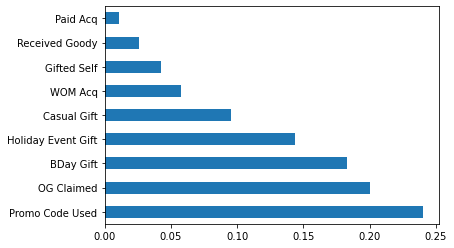

In [19]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')